# MAC0460 / MAC5832 (2020)
<hr>

## EP5: Neural Networks

# 0. Using code/concepts/data from pe04

In [17]:
# Util functions
def add_feature_ones(X):
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


# 1. MNIST Dataset and Treating Data#

The dataset acquisition process and basic treating algorithms have been inherited from PE04.

In [21]:
from tensorflow.keras.datasets import mnist

def print_data_info(name, data):
    print(name)
    print('dtype: %s' % type(data))
    print('shape:', data.shape)
    print('min val:', data.min())
    print('max val:', data.max())
    
def to_features (data):
    return [np.concatenate([row for row in sample]) for sample in data]

np.random.seed(56789)
def shuffle(X, y):
    # input and output must be shuffled equally
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

In [22]:
(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

### Make features, select amount of samples and fix types

In [49]:
X_train_classes = []
y_train_classes = []
min_intensity = X_train_all.min()
max_intensity = X_train_all.max()
normalizer = lambda feat: (feat-min_intensity)/(max_intensity-min_intensity)
class_size = 2000
classes = [i for i in range(0,10)]

# prepare train data according to prompt
for i in classes:
    Xc = X_train_all[y_train_all == i]
    Yc = y_train_all[y_train_all == i]
    Xc = to_features(Xc[:class_size])
    Xc = np.array([(sample-min_intensity)/(max_intensity-min_intensity) for sample in Xc])
    Yc = Yc[:class_size]
    X_train_classes.append(Xc)
    y_train_classes.append(Yc)

# prepare test data according to prompt
X_test = to_features(X_test_all)
X_test = np.array([np.array([normalizer(feat) for feat in sample]) for sample in X_test])
y_test = y_test_all

X_train = np.concatenate([d_class for d_class in X_train_classes])
y_train = np.concatenate([d_class for d_class in y_train_classes])

X_test, y_test = shuffle(X_test, y_test)
X_train, y_train= shuffle(X_train, y_train)

print_data_info('X_train', X_train)
print_data_info('y_train', y_train)
print_data_info('X_test', X_test)
print_data_info('y_test', y_test)

X_train
dtype: <class 'numpy.ndarray'>
shape: (20000, 784)
min val: 0.0
max val: 1.0
y_train
dtype: <class 'numpy.ndarray'>
shape: (20000,)
min val: 0
max val: 9
X_test
dtype: <class 'numpy.ndarray'>
shape: (10000, 784)
min val: 0.0
max val: 1.0
y_test
dtype: <class 'numpy.ndarray'>
shape: (10000,)
min val: 0
max val: 9


# 2. Choosing a Model

From the three models described, I went with the first one as it showed the best results in the k-fold tests.

In [53]:
def print_fold(y, train=None, alls=False):
    class_count = {}
    aset = train
    if alls:
        aset = [i for i in range(len(y))]
    for i in aset:
        if y[i] in class_count.keys():
            class_count[y[i]] += 1
        else:
            class_count[y[i]] = 1
    for k in class_count.keys():
        print("{0}: {1}".format(k, class_count[k]))

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# used to do 5-fold
kf = KFold(5)

### 1. Model from supplied [source](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/2.1-a-first-look-at-a-neural-network.ipynb)

In [41]:
# 'adam' and adaptative do, more or less, matche rmsprop used in the source
# MLP uses cross-entroyp
# It is not possible to have different actiation functions for different layers, 
#  so using default (unlike the souce)
network1 = MLPClassifier(solver='adam', activation='relu',
                         hidden_layer_sizes=(784, 512, 10),
                         early_stopping=True)    

### 2. Same model, but increasing number of layers and using logistic, instead of relu

In [42]:
network2 = MLPClassifier(solver='adam', activation='logistic', 
                         hidden_layer_sizes=(784, 512, 128, 10),
                         early_stopping=True)

### 3. Different solver algorithm, but same number of layers

In [43]:
network3 = MLPClassifier(solver='sgd', activation='relu', learning_rate='adaptive',
                         hidden_layer_sizes=(784, 512, 10), early_stopping=True)

#### Generates metrics

In [50]:
res = {"NN 1":[], "NN 2":[], "NN 3":[]}
for i, (train, test) in enumerate(kf.split(X_train, y_train)):
    print("Fold " + str(i + 1))
    print_fold(y_train, train)
    network.fit(X_train[train], y_train[train])
    network2.fit(X_train[train], y_train[train])
    network3.fit(X_train[train], y_train[train])
    res["NN 1"].append("[fold {0}] score: {1:.5f}".
                      format(i, network.score(X_train[test], y_train[test])))
    res["NN 2"].append("[fold {0}] score: {1:.5f}".
                      format(i, network2.score(X_train[test], y_train[test])))
    res["NN 3"].append("[fold {0}] score: {1:.5f}".
                      format(i+1, network3.score(X_train[test], y_train[test])))

Fold 1
8: 1612
7: 1608
9: 1596
2: 1590
5: 1599
1: 1587
3: 1607
0: 1585
6: 1623
4: 1593
Fold 2
6: 1607
0: 1609
5: 1591
8: 1581
7: 1569
1: 1583
2: 1622
3: 1581
9: 1616
4: 1641
Fold 3
6: 1590
0: 1594
5: 1621
8: 1608
7: 1597
1: 1592
2: 1608
3: 1599
9: 1605
4: 1586
Fold 4
6: 1610
0: 1611
5: 1597
8: 1593
7: 1611
1: 1602
2: 1562
3: 1605
9: 1609
4: 1600
Fold 5
6: 1570
0: 1601
5: 1592
8: 1606
7: 1615
1: 1636
2: 1618
3: 1608
9: 1574
4: 1580


In [55]:
for k in res.keys():
    print("%s" % k)
    for st in res[k]:
        print(st)

NN 1
[fold 0] score: 0.97075
[fold 1] score: 0.96675
[fold 2] score: 0.96575
[fold 3] score: 0.96675
[fold 4] score: 0.96575
NN 2
[fold 0] score: 0.88650
[fold 1] score: 0.95525
[fold 2] score: 0.95525
[fold 3] score: 0.96150
[fold 4] score: 0.95675
NN 3
[fold 1] score: 0.95475
[fold 2] score: 0.95675
[fold 3] score: 0.94825
[fold 4] score: 0.95700
[fold 5] score: 0.95800


# Results with chosen method

In [85]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [71]:
print_fold(y_train, alls=True)
network.fit(X_train, y_train)

6: 2000
0: 2000
5: 2000
8: 2000
7: 2000
1: 2000
2: 2000
3: 2000
9: 2000
4: 2000


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784, 512, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

0.9754


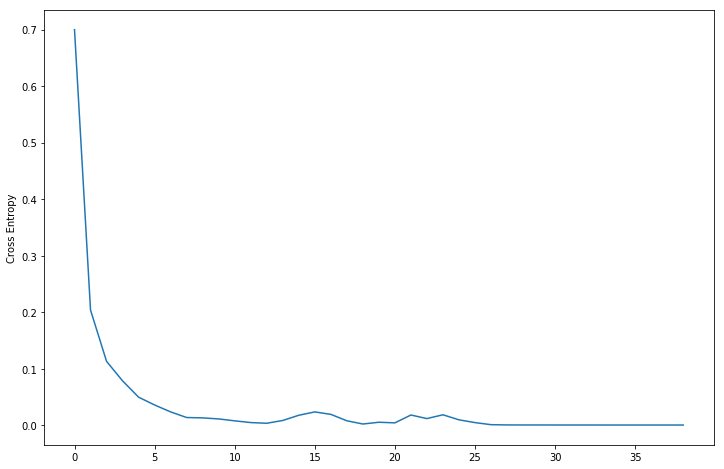

In [88]:
print (network.score(X_test,y_test))
plt.figure(figsize = (12, 8))
plt.plot(network.loss_curve_)
plt.ylabel('Cross Entropy')
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix
y_pred = network.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 964    1    0    2    1    0    2    0    6    4]
 [   1 1126    3    0    0    2    3    0    0    0]
 [   6    1 1007    3    1    0    0    6    7    1]
 [   0    1    5  980    0    4    0    7    8    5]
 [   0    0    1    1  955    0    9    2    3   11]
 [   2    0    1   10    1  866    3    1    4    4]
 [   4    3    1    1    3    2  940    0    4    0]
 [   0    7   12    1    2    0    1  990    3   12]
 [   4    0    3    2    4    7    3    3  945    3]
 [   4    2    0    5    8    0    0    6    3  981]]


In [91]:
# code from https://stackoverflow.com/questions/39033880/plot-confusion-matrix-sklearn-with-multiple-labels
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

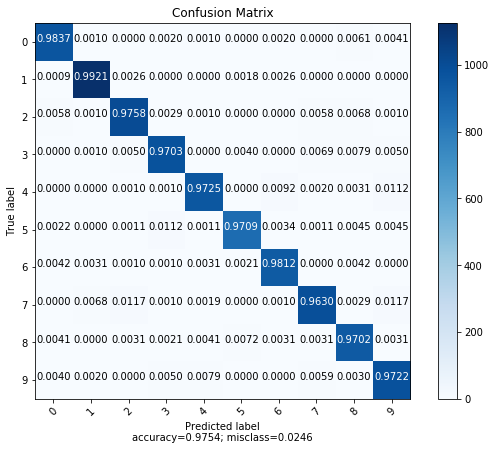

In [97]:
plot_confusion_matrix(confusion, [i for i in range(10)], "Confusion Matrix")

## 3. Additional Comments

- It would be interesting to check many more possible congurations of hyperparameters for the neural network it one was indeed looking for the highest possible accuracy

- Network1 is as close to the supplied model as I could do. The difference is that the algorithm is not the same as the one used on keras is not available o sci-kit learn and I cannot do different activation functions for different layers

- If you change the value of the variable class_size to something between 10 and 100 and the 5-fold to a 2-fold, you can run the code in rather quickly. In the very small samples, you will find that the first network has much better accuracy than the other two, unlike with larger sets, where the results were close.

- I cannot exaplain the two portions on the cross entropy graph above wehre there is increase

- Printing the confusion matrix with text seems more readable to me than the plot, although I believe the plot I found on SO is very good. Maybe for a larger number of classes, an alternative plot is required.